<a href="https://colab.research.google.com/github/AhmedKhan2210/Netflix-Business-Case/blob/main/NetflixBusinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("netflix.csv")
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
comma_saperated_value_in_listed_in = df[df["listed_in"].apply(lambda x: "," in str(x))]

comma_saperated_value_in_director= df[df["director"].apply(lambda x: ',' in str(x))]

comma_saperated_value_in_country=df[df["country"].apply(lambda x:  "," in str(x) )]

comma_saperated_value_in_cast =df[df["cast"].apply(lambda x: isinstance(x, str) and "," in x if x else False)]

total_null_date=len(df[df["date_added"].isnull()])
total_null_country=len(df[df["country"].isnull()])

total_null_director=len(df[df["director"].isnull()])

total_null_cast= len(df[df["cast"].isnull()])

total_null_duration = len(df[pd.isna(df["duration"])])

In [ ]:
#filling and replacing Unknown/missing/null Values

df['country'].fillna("Unknown country",inplace= True)
df["director"].fillna("Unknown director", inplace=True)
df["cast"].fillna("Unknow actor", inplace=True)


In [ ]:
new_index=[5541,5794,5813]
duration_value=['74 min', '84 min', '66 min']
df.loc[new_index, "duration"]=duration_value

In [ ]:
df.iloc[[5541,5794,5813]]  #checking wether filling value is done or not

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df[pd.isna(df["date_added"])]

#Total 10 rows in dete_added which are null


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown director,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown director,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown director,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown director,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown director,Igor Dmitriev,Unknown country,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown director,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown director,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Filling none rows in column date_added with most occuring date for each country

In [ ]:
most_ocr_date= df.groupby(by=["country","date_added"])["date_added"].value_counts().sort_values(ascending=False)

In [ ]:
most_ocr_date

country        date_added       
India          December 31, 2019    54
United States  January 1, 2020      52
               November 1, 2019     52
India          March 1, 2018        50
               October 1, 2018      47
                                    ..
Malaysia       December 1, 2017      1
               August 7, 2017        1
               August 25, 2017       1
               April 5, 2019         1
Zimbabwe       June 1, 2020          1
Name: count, Length: 5389, dtype: int64

In [ ]:
most_ocr_date.loc["United Kingdom"]

date_added
March 31, 2017       12
February 1, 2019     11
August 1, 2017       11
October 2, 2018      10
December 31, 2018     7
                     ..
November 4, 2017      1
November 4, 2019      1
November 5, 2019      1
November 8, 2019      1
November 9, 2016      1
Name: count, Length: 281, dtype: int64

In [ ]:
most_ocr_date.loc["Japan"]

date_added
September 15, 2021    12
September 1, 2017      8
September 20, 2020     6
October 15, 2016       5
April 15, 2021         5
                      ..
May 22, 2018           1
May 19, 2017           1
May 15, 2020           1
May 14, 2019           1
May 1, 2020            1
Name: count, Length: 168, dtype: int64

In [ ]:
most_ocr_date.loc["Australia"]

date_added
July 28, 2018       3
June 1, 2016        2
February 1, 2018    2
July 1, 2017        2
July 12, 2019       2
                   ..
July 23, 2021       1
July 18, 2020       1
July 15, 2018       1
July 14, 2020       1
January 3, 2019     1
Name: count, Length: 76, dtype: int64

In [ ]:
new_row=[6174,6795,6806,7254,7406,7847]
value="January 1, 2020"
df.loc[new_row, "date_added"]=value
df.loc[6066, 'date_added']="March 31, 2017"
df.loc[6901,"date_added"]="September 15, 2021"
df.loc[8182, "date_added"]="July 28, 2018"
df.to_csv("netflixclean.csv", index=False)

In [ ]:
df.drop(7196, axis=0, inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(8806, 12)

In [ ]:
df.to_csv("netflixclean.csv", index=False)    #cleaned data wih all none values are filled

In [ ]:
df['list_of_cast'] = df['cast'].apply(lambda x: str(x).split(', '))

In [ ]:
df["list_of_director"] = df["director"].apply(lambda x: str(x).split(', '))
df["list_of_country"] = df["country"].apply(lambda x: str(x).split(', '))
df["list_of_listed_in"] = df["listed_in"].apply(lambda x: str(x).split(', '))

In [ ]:
cast_df=df.explode("list_of_cast")

In [ ]:
country_df=df.explode('list_of_country')

In [ ]:
director_df=df.explode('list_of_director')

In [ ]:
genre_df=df.explode('list_of_listed_in')

In [ ]:
genre_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,list_of_cast,list_of_director,list_of_country,list_of_listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknow actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Unknow actor],[Kirsten Johnson],[United States],Documentaries
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[Unknown director],[South Africa],International TV Shows
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[Unknown director],[South Africa],TV Dramas


In [ ]:
movie_df= df[df['type']=="Movie"]

In [ ]:
tvshow_df= df[df['type']=="TV Show"]

#1. Find the counts of each categorical variable both using graphical and nongraphical analysis.



**1a: For Non-graphical Analysis:**

In [ ]:
director_df["list_of_director"].value_counts()

list_of_director
Unknown director    2633
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: count, Length: 4994, dtype: int64

In [ ]:
top_10_director = director_df["list_of_director"].value_counts().index[1:10]

top_10_director= director_df.loc[director_df["list_of_director"].isin(top_10_director)]


Rajiv Chilaka  is the most popular director who directed 22 movies, so netflix should consider Rajive, Jan suter and Raul campos to direct movies.

**1b: For graphical analysis**

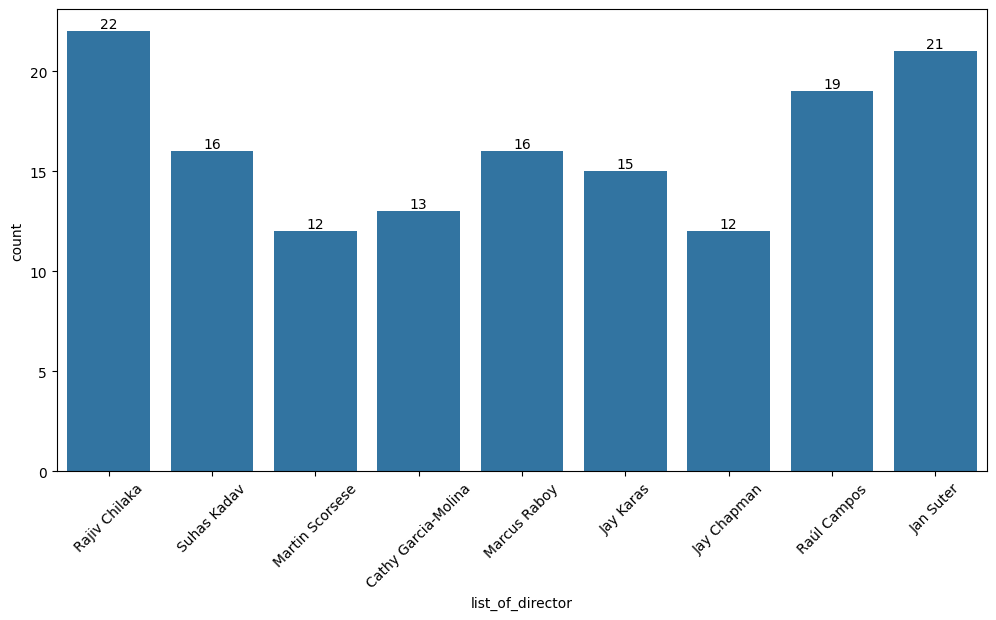

In [ ]:
plt.figure(figsize=(12,6))
a=sns.countplot(data=top_10_director, x="list_of_director")
a.bar_label(a.containers[0])
plt.xticks(rotation=45)
plt.show()

In [ ]:
director_df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
director_df.groupby(by="type")["list_of_director"].value_counts().sort_values(ascending=False)

type     list_of_director
TV Show  Unknown director    2445
Movie    Unknown director     188
         Rajiv Chilaka         22
         Jan Suter             21
         Raúl Campos           19
                             ... 
         Shaun Mir              1
         Alfons Adetuyi         1
         Shawn Arranha          1
         Shawn Crahan           1
TV Show  Ziad Doueiri           1
Name: count, Length: 5078, dtype: int64

# Most popular director for TV Show

#1a

In [ ]:
director_from_tvshow=director_df[director_df['type']=="TV Show"]["list_of_director"].value_counts()

In [ ]:
director_from_tvshow

list_of_director
Unknown director         2445
Alastair Fothergill         3
Ken Burns                   3
Iginio Straffi              2
Gautham Vasudev Menon       2
                         ... 
Jesse Vile                  1
Ellena Wood                 1
Picky Talarico              1
Pedro Waddington            1
Michael Cumming             1
Name: count, Length: 300, dtype: int64

Alastair Fothergill is the most popular director for TV show, who directed 3 TV Shows so for TV Shows Netflix should consider Alastair Fothergill to direct TV Shows

#Most popular actor


#1a:

In [ ]:
cast_df['list_of_cast'].value_counts()

list_of_cast
Unknow actor               825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: count, Length: 36439, dtype: int64

Anupam kher is most popular actor in Movies , acted in 43 movies, so to cast a movie Anupam kher should be consider as he is best in terms of movie production also we have option to cast SRk and Naseeruddin as both have acted in more than 30 movies

#1b

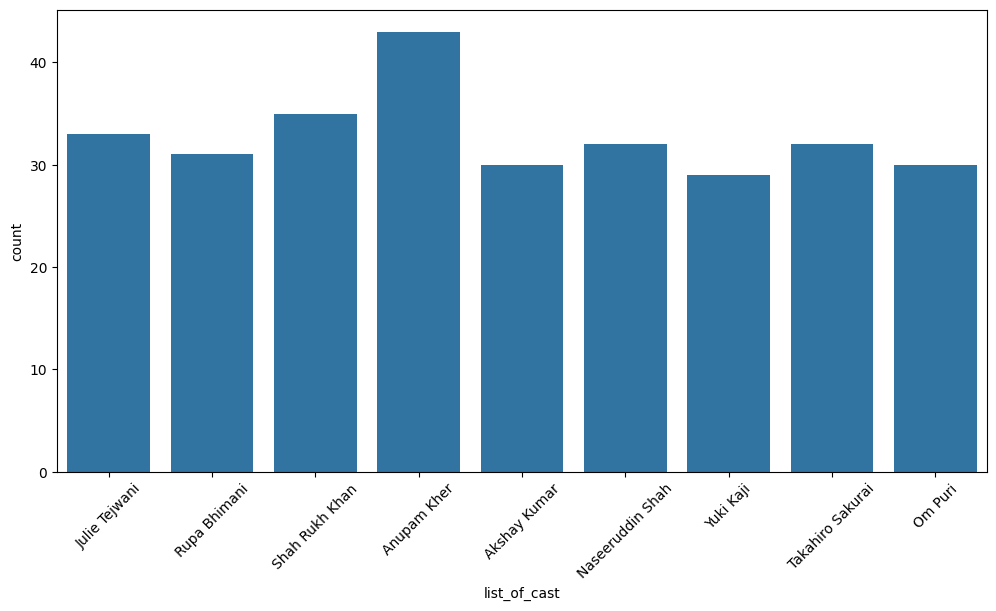

In [ ]:
top_10_actor =cast_df["list_of_cast"].value_counts().index[1:10]
top_10_actor = cast_df.loc[cast_df["list_of_cast"].isin(top_10_actor)]
plt.figure(figsize=(12,6))
sns.countplot(data=top_10_actor, x="list_of_cast")
plt.xticks(rotation=45)
plt.show()

#Most popular actor for TV SHow

#1a

In [ ]:
cast_df[cast_df["type"]=="TV Show"]["list_of_cast"].value_counts()

list_of_cast
Unknow actor             350
Takahiro Sakurai          25
Yuki Kaji                 19
Junichi Suwabe            17
Ai Kayano                 17
                        ... 
Bhumibhat Thavornsiri      1
Thanongsak Suphakan        1
Kanjanaporn Plodpai        1
Boonsong Nakphoo           1
Hina Khawaja Bayat         1
Name: count, Length: 14863, dtype: int64

In [ ]:
top_20_actor=cast_df[cast_df["type"]=="TV Show"]["list_of_cast"].value_counts().index[1:21]

In [ ]:
top_20_actor=cast_df.loc[cast_df["list_of_cast"].isin(top_20_actor)]

#1b

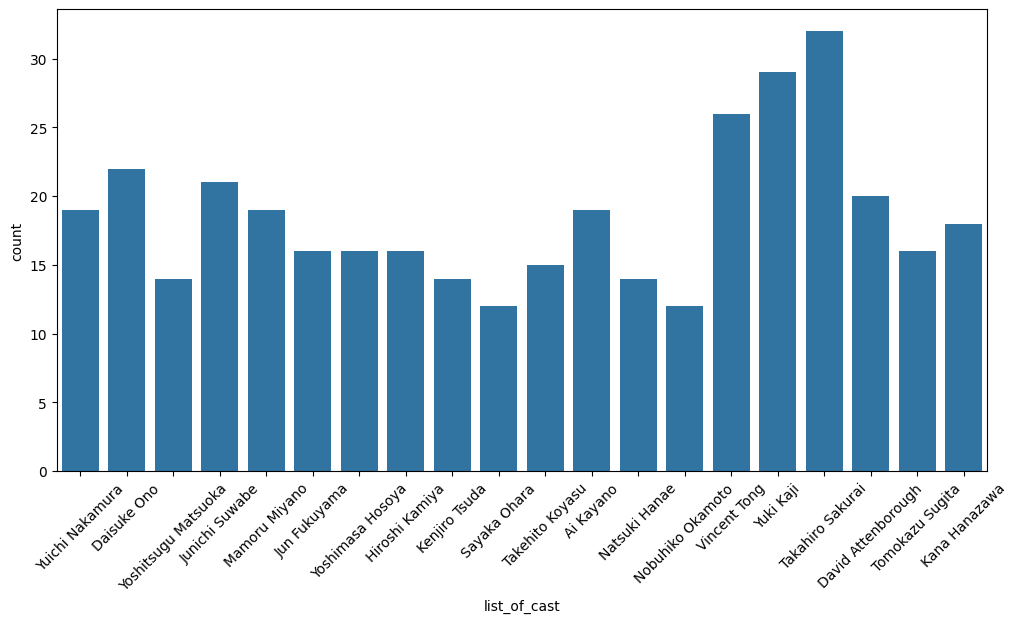

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=top_20_actor,x="list_of_cast")
plt.xticks(rotation=45)
plt.show()

Takahiro Sakurai is the most popular actor for TV Shows so netflix should consider Takahiro Sakurai as he is top TV actor and also we have option to consider Yuki, Junichi, Kayano as option as they are 2nd 3rd top position to act as TV actor

#Country by number of movies and TV show


#1a

In [ ]:
top_country = country_df[["type","list_of_country"]].groupby(by=["list_of_country","type"]).size().sort_values(ascending=False).reset_index(name="count")

In [ ]:
top_country

,list_of_country,type,count
0,United States,Movie,2751
1,India,Movie,962
2,United States,TV Show,938
3,United Kingdom,Movie,532
4,Unknown country,Movie,440
...,...,...,...
185,Hungary,TV Show,1
186,Sri Lanka,Movie,1
187,Sudan,Movie,1
188,Panama,Movie,1


#1b

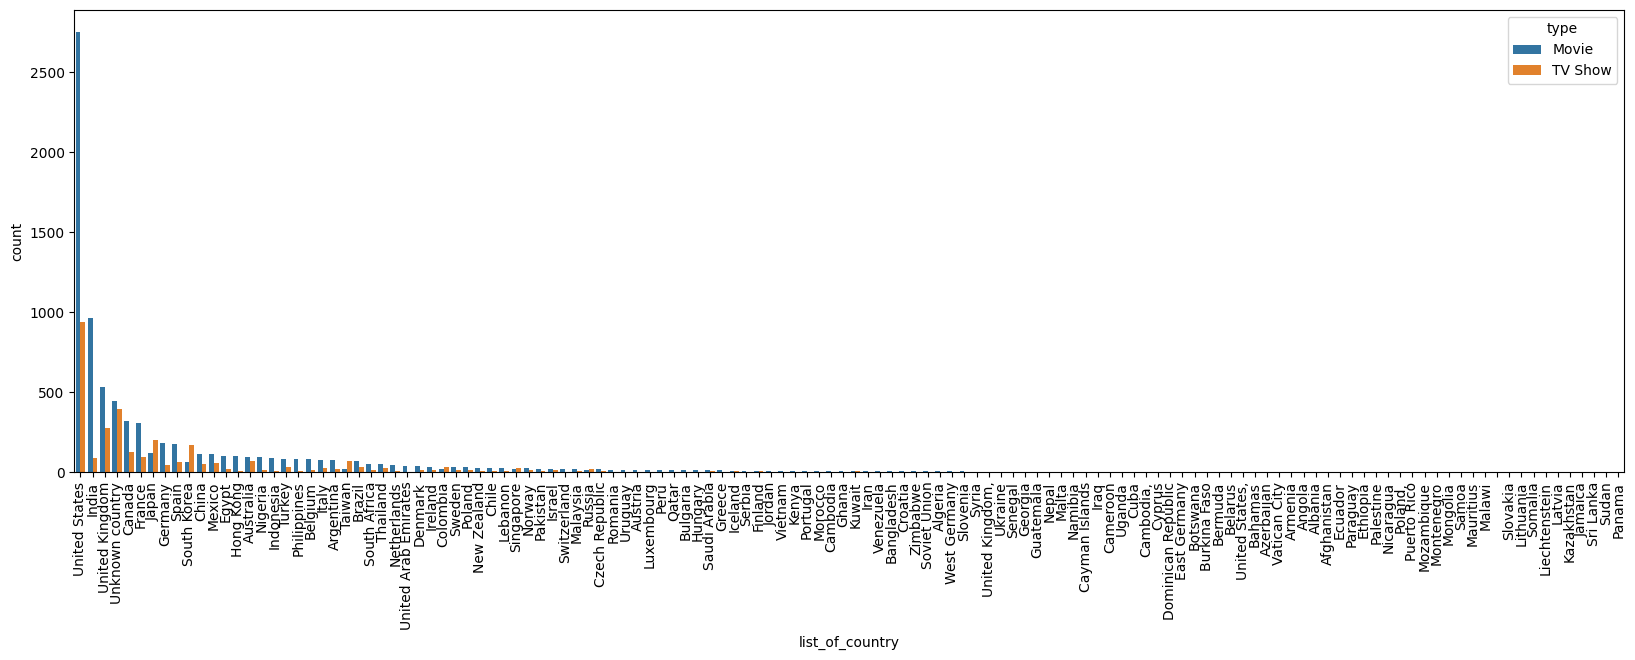

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=top_country,x="list_of_country",y="count", hue="type")
plt.xticks(rotation=90)
plt.show()

united state and india are the top country to release movies, so if netflix want to add movie on its platform so first consider US, then india and can consider UK, Canada and Japan to release movie as they are among 5 top countries

In [ ]:
some_top_country= top_country[8:100]

#1b

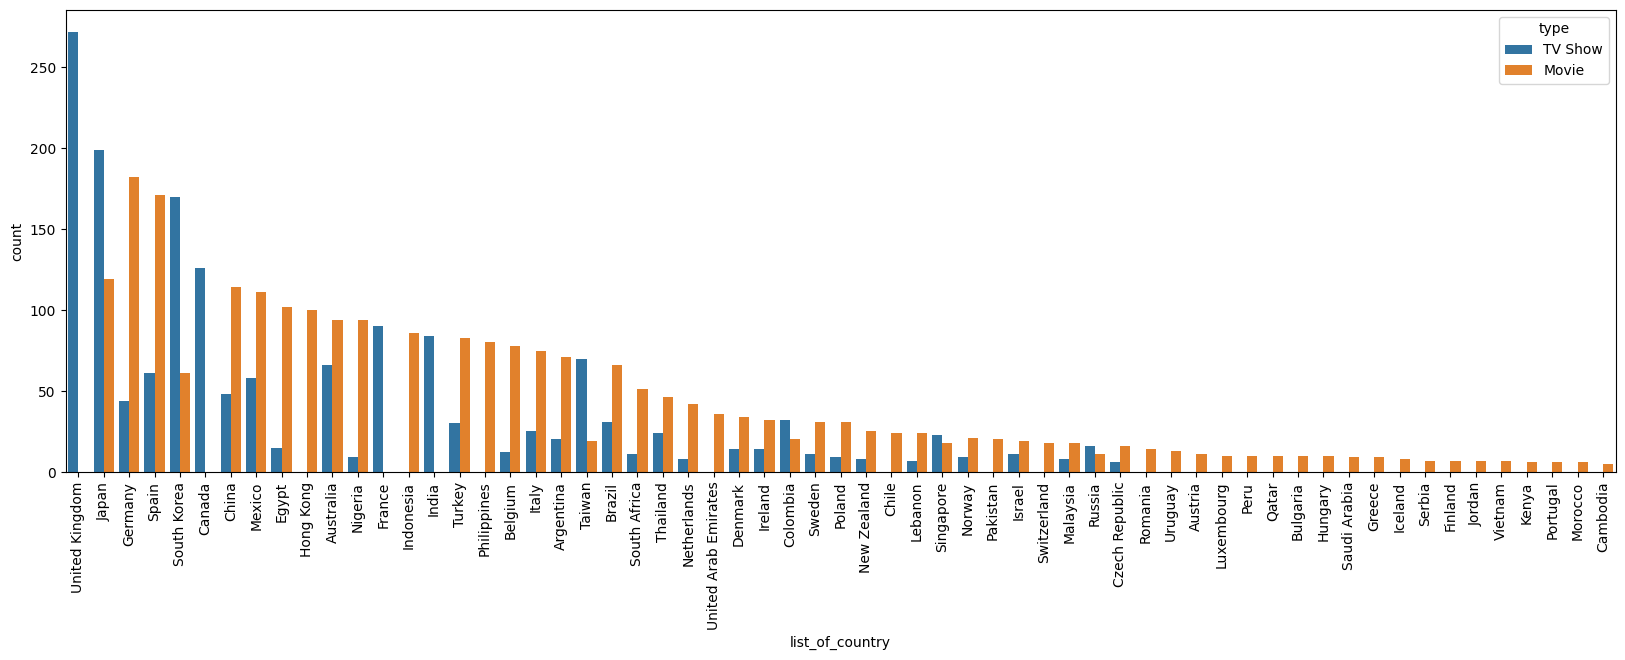

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=some_top_country,x="list_of_country",y="count", hue="type")
plt.xticks(rotation=90)
plt.show()

1:- After observing data in the starting records US, India, UK, Canada, france are high in number of watching movies
2:- last 90 countries have very low records of watching movies or TV shows, it is around less than 5 movie or TV show records
3:- so analyzed data for first 100 countries and found that UK, Japan , South Korea, Taiwan, colambia are the best place to release TV show instead of movies

In [ ]:
genre_df['list_of_listed_in'].nunique()

42

#Most watched genre

#1a

In [ ]:
genre_df["list_of_listed_in"].value_counts()

list_of_listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows     

#1b

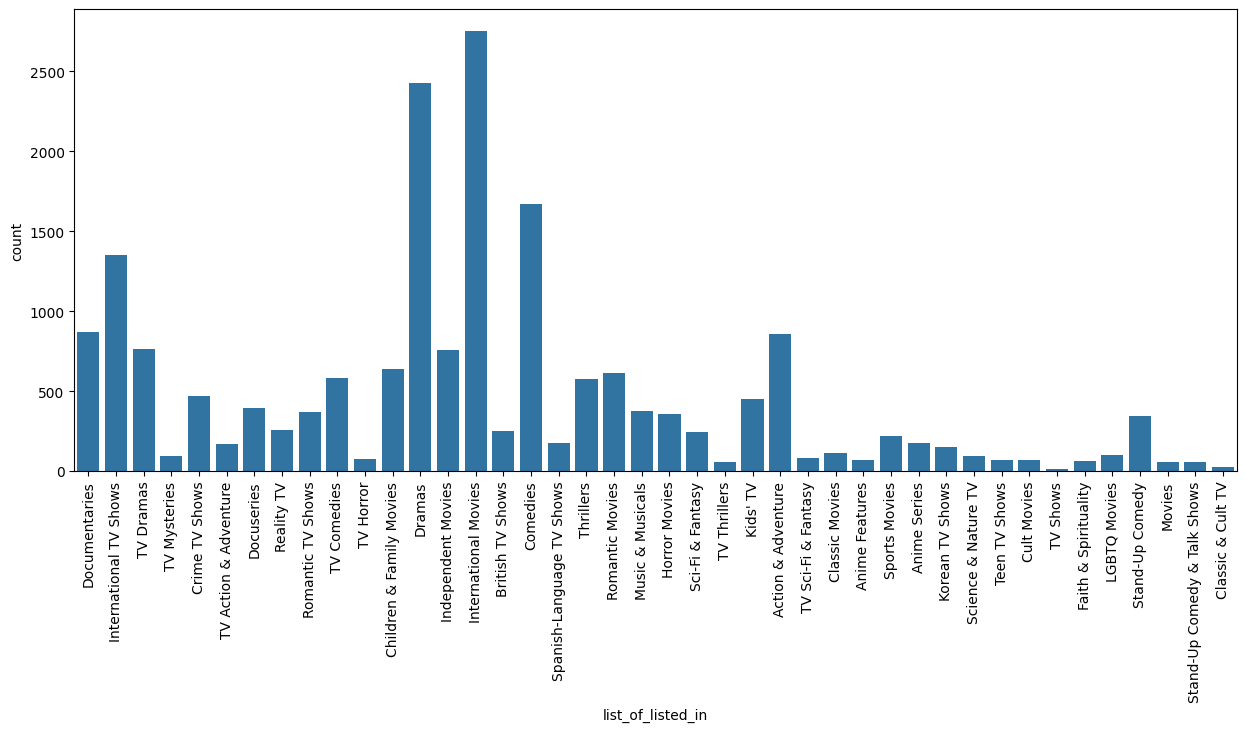

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=genre_df, x="list_of_listed_in")
plt.xticks(rotation=90)
plt.show()

Dramas and international movies are the most watched genre in the world, so netflix should consider genre as Dramas, international movies, and option to consider comedies genre to produce movie

#Which: Genre best for which country

#1a

In [ ]:
genre_df1= genre_df[["show_id","list_of_listed_in"]]
country_df1 = country_df[["show_id","list_of_country"]]

In [ ]:
merged_genre_df=genre_df1.merge(country_df1, on="show_id",how="inner")

In [ ]:
merged_genre_df.groupby(by="list_of_country")["list_of_listed_in"].value_counts().sort_values(ascending=False)

list_of_country  list_of_listed_in   
India            International Movies    864
United States    Dramas                  835
                 Comedies                680
India            Dramas                  662
United States    Documentaries           511
                                        ... 
Mongolia         Documentaries             1
                 International Movies      1
Montenegro       Dramas                    1
                 International Movies      1
Zimbabwe         Romantic Movies           1
Name: count, Length: 1464, dtype: int64

In [ ]:
a=merged_genre_df[['list_of_country','list_of_listed_in']].groupby(by=["list_of_country",'list_of_listed_in']).size().reset_index(name="count").sort_values(by="count",ascending=False)

In [ ]:
b=a[:25]



#1b

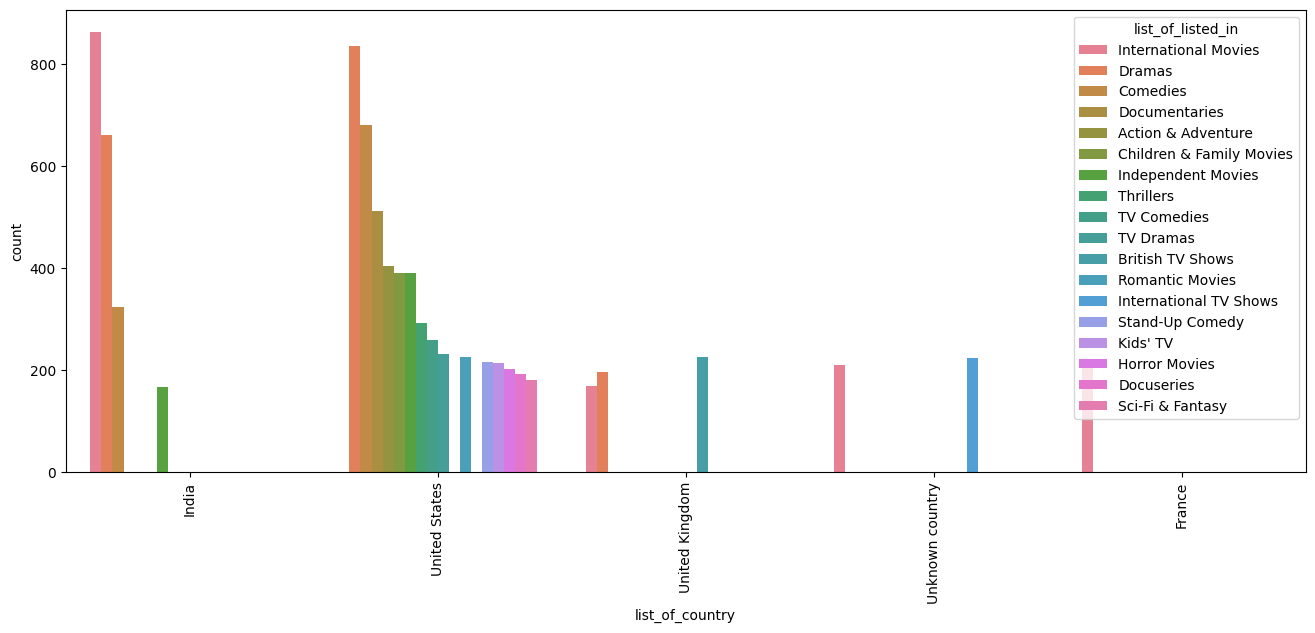

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(data=b, x="list_of_country", y="count", hue="list_of_listed_in",dodge=True)
plt.xticks(rotation=90)

plt.show()

As we can see clearly India is highest among other countries watching international movies, In US if we release Drama high chance people will love it, thriller and TV drama are moderate in US, so netflix should consider international movies to launch in india and drama should launch in US first to make huge profit

#Which actor is best suited for each genre

#1a

In [ ]:
genre_df1
cast_df1 = cast_df[["show_id", "list_of_cast"]]
cast_df1

merged_genre_cast = genre_df1.merge(cast_df1, on ="show_id", how="inner")
merged_genre_cast.groupby(by=["list_of_listed_in","list_of_cast"]).size().sort_values(ascending=False)

# getting unknown first so slicing in next step to avoid unknown actor and plot in graph

list_of_listed_in         list_of_cast 
Documentaries             Unknow actor     424
Docuseries                Unknow actor     207
International Movies      Unknow actor     178
International TV Shows    Unknow actor     109
Reality TV                Unknow actor      92
                                          ... 
Independent Movies        Julia Eringer      1
                          Julia Duffy        1
                          Juju Chan          1
Children & Family Movies  Kang Shi-hyun      1
International Movies      Wang Duo           1
Length: 113150, dtype: int64

In [ ]:
b=merged_genre_cast.groupby(by=["list_of_listed_in","list_of_cast"]).size().sort_values(ascending=False).reset_index(name="count")
b=b[13:34]

#1b

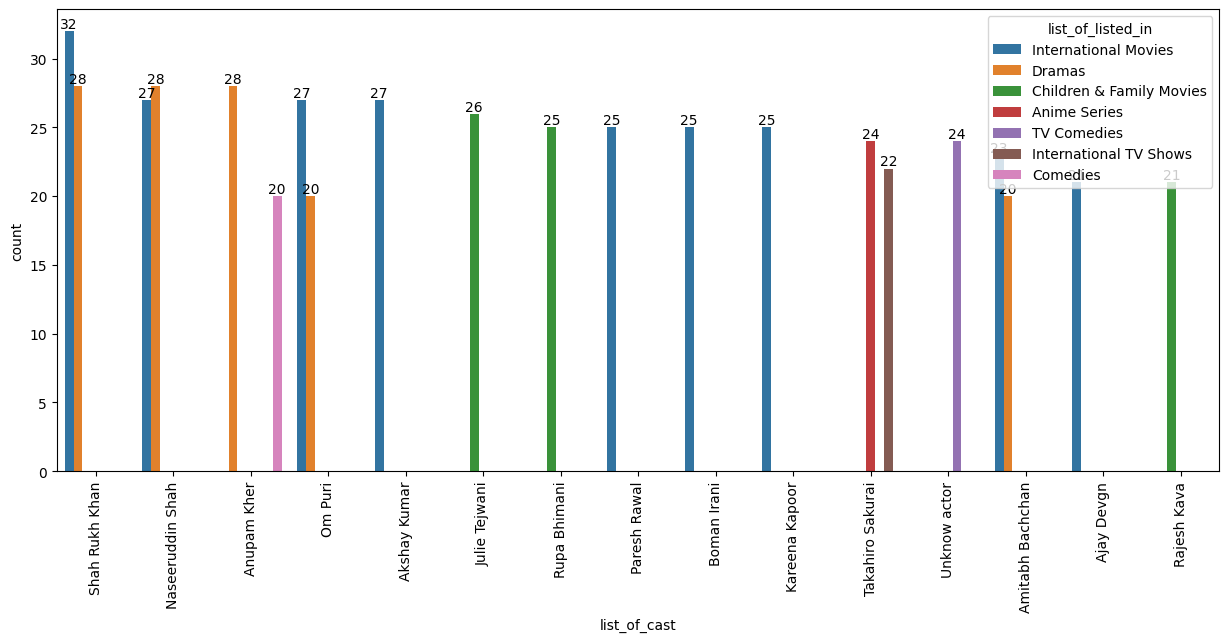

In [ ]:
plt.figure(figsize=(15,6))
c=sns.barplot(data=b, x="list_of_cast", y="count",hue="list_of_listed_in")
for i in c.containers:
  c.bar_label(i)
plt.xticks(rotation=90)
plt.show()


Afet observing above graph if we want to produce International Movies we should cast sharukh khan and for darama we have three option SRK, Naseeruddin and Anupam kher and for comedies anupam kher is best, for childrem and family movies we can choose Julie Tejwani, Rupa Bhimani

#4:- Identify the top 10 directors


**4a:- top 10 directors who have appeared in most TV shows.**

In [ ]:
director_from_tvshow=director_df[director_df['type']=="TV Show"]["list_of_director"].value_counts()
# To Remove Unknown director slicing start from 1

In [ ]:
top_10_director_from_tvshow = director_from_tvshow[1:11].reset_index(name="count")

In [ ]:
top_10_director_from_tvshow

,list_of_director,count
0,Alastair Fothergill,3
1,Ken Burns,3
2,Iginio Straffi,2
3,Gautham Vasudev Menon,2
4,Hsu Fu-chun,2
5,Stan Lathan,2
6,Shin Won-ho,2
7,Joe Berlinger,2
8,Lynn Novick,2
9,Rob Seidenglanz,2


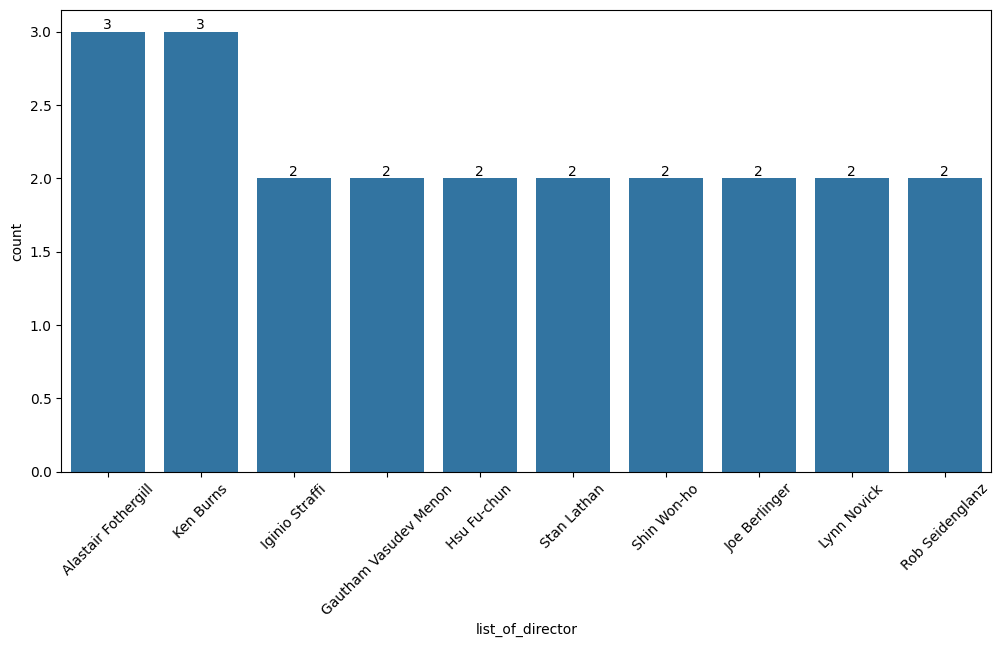

In [ ]:
plt.figure(figsize=(12,6))
d=sns.barplot(data=top_10_director_from_tvshow, x="list_of_director", y="count")
plt.xticks(rotation = 45)
d.bar_label(d.containers[0])
plt.show()

we can consider Alastair Fothergill, and ken burns as the are most popular among 10

**4b:-top 10 directors who have appeared in most movies.**

In [ ]:
director_from_movies=director_df[director_df['type']=="Movie"]["list_of_director"].value_counts()
# To Remove Unknown director slicing start from 1

In [ ]:
top_10_director_from_movies = director_from_movies[1:11].reset_index(name="count")

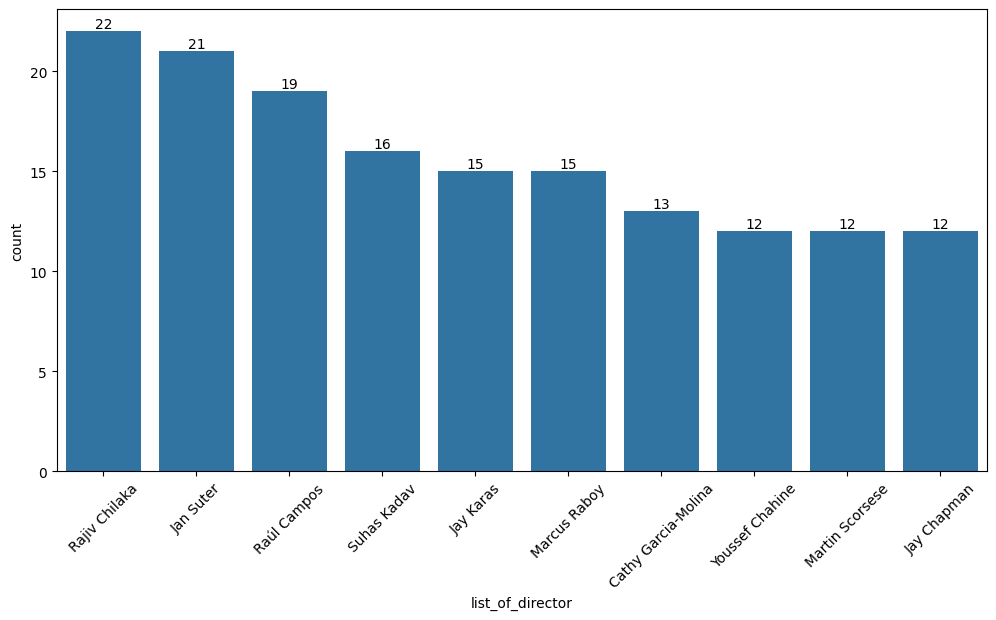

In [ ]:
plt.figure(figsize=(12,6))
d=sns.barplot(data=top_10_director_from_movies, x="list_of_director", y="count")
plt.xticks(rotation = 45)
d.bar_label(d.containers[0])
plt.show()

Rajiv Chilaka and Jan Suter is the most popular director in movies

#5. Which genre movies are more popular or produced more

In [ ]:
#In genre movies international movies and Drama are produced more in the world
genre_df[genre_df["type"]=="Movie"]["list_of_listed_in"].value_counts()

list_of_listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: count, dtype: int64

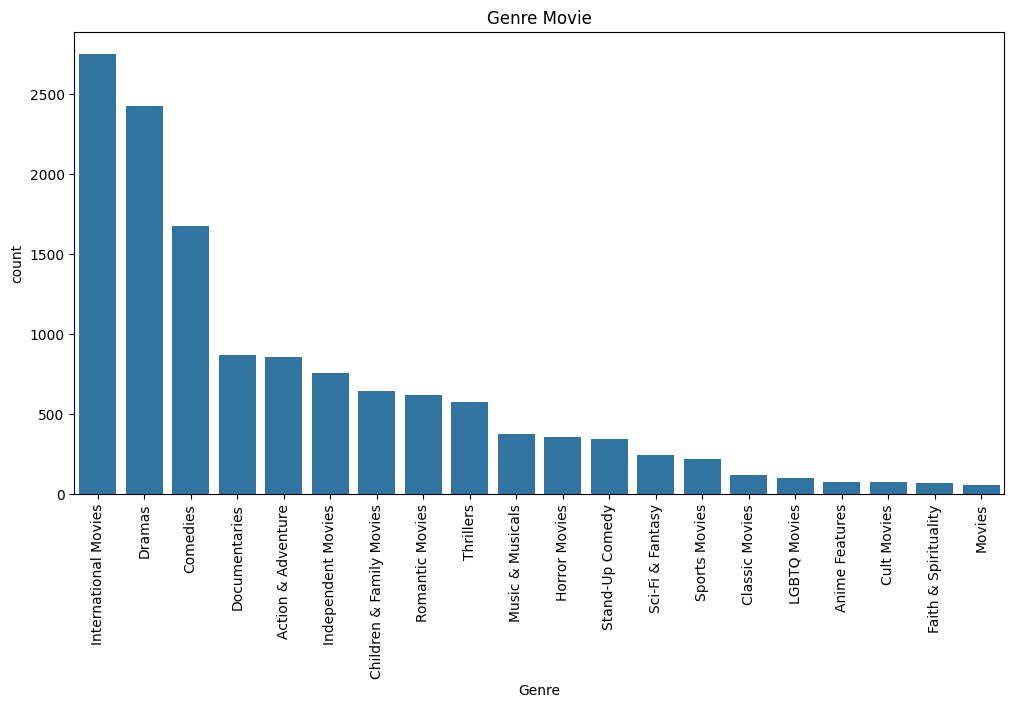

In [ ]:
e = genre_df[genre_df["type"]=="Movie"]["list_of_listed_in"].value_counts().reset_index(name="count")
plt.figure(figsize=(12,6))
plt.title("Genre Movie")
sns.barplot(data=e,x='list_of_listed_in', y="count")
plt.xlabel("Genre")

plt.xticks(rotation=90)

plt.show()

International Movie and drama are most popular genre which are produced more so netflix should think these genre to produce movie

In [ ]:
#as compared to genre movies genre TV show are less produced
genre_df[genre_df["type"]=="TV Show"]["list_of_listed_in"].value_counts()

list_of_listed_in
International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: count, dtype: int64

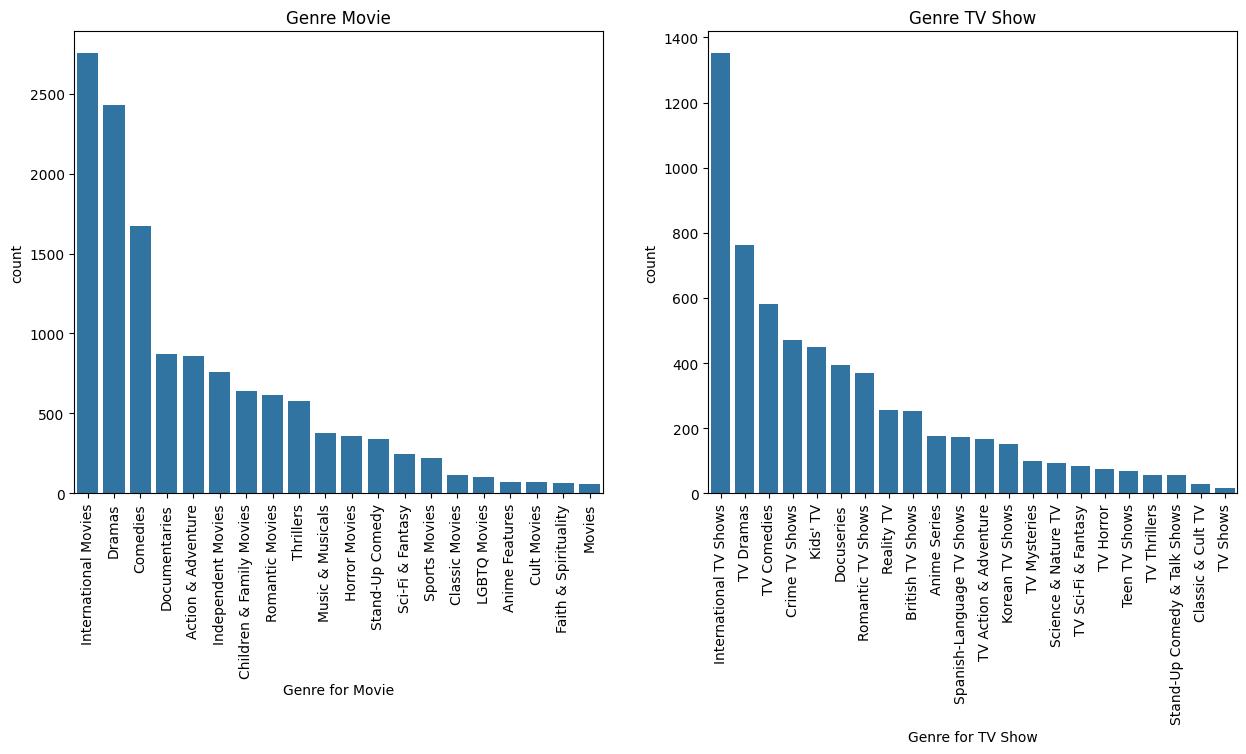

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
e = genre_df[genre_df["type"]=="Movie"]["list_of_listed_in"].value_counts().reset_index(name="count")

plt.title("Genre Movie")
sns.barplot(data=e,x='list_of_listed_in', y="count")
plt.xlabel("Genre for Movie")

plt.xticks(rotation=90)

plt.subplot(1,2,2)
f = genre_df[genre_df["type"]=="TV Show"]["list_of_listed_in"].value_counts().reset_index(name="count")

plt.title("Genre TV Show")
sns.barplot(data=f,x='list_of_listed_in', y="count")
plt.xlabel("Genre for TV Show")

plt.xticks(rotation=90)
plt.show()


as compared to genre movies genre TV show are less produced

#2. Comparison of tv shows vs. movies.

2a : Find the number of movies produced in each country and pick the top 10 countries.

In [ ]:
country_df1 = country_df[["show_id","type","list_of_country","title"]]
movie_country_df1=country_df1[country_df1['type']=="Movie"]
movie_country_df1.groupby(by="list_of_country")["title"].nunique().sort_values(ascending=False)

list_of_country
United States      2751
India               962
United Kingdom      532
Unknown country     440
Canada              319
                   ... 
Nicaragua             1
Palestine             1
Panama                1
Paraguay              1
Malawi                1
Name: title, Length: 123, dtype: int64

In [ ]:
#to plot graph for top 10 movie producing countries
q= movie_country_df1.groupby(by="list_of_country")["title"].size().reset_index(name="count")
q= q.sort_values(by="count",ascending=False)
q= q[:10]
q

,list_of_country,count
114,United States,2751
43,India,962
112,United Kingdom,532
116,Unknown country,440
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114


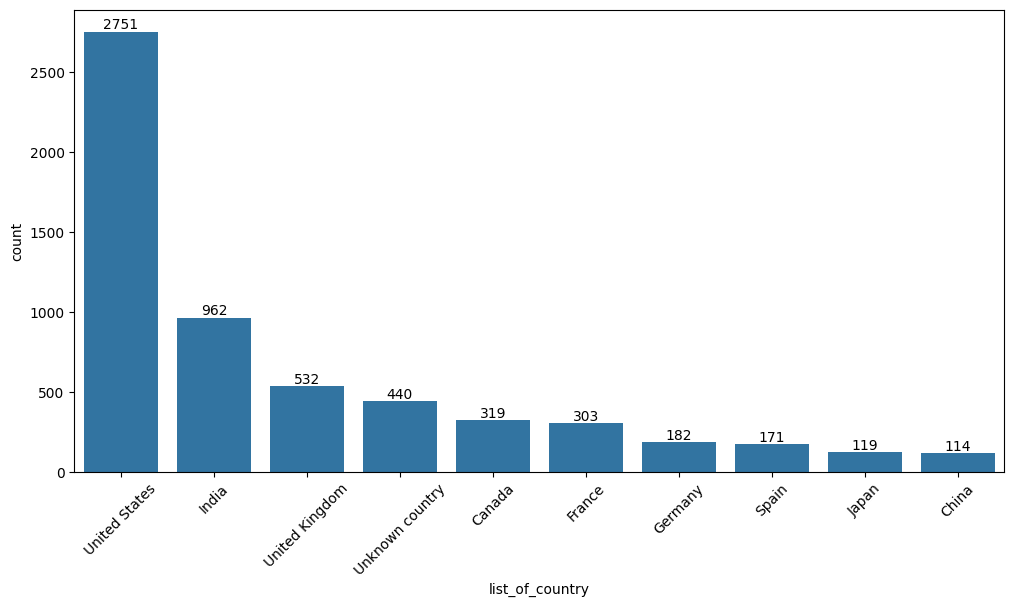

In [ ]:
plt.figure(figsize=(12,6))
w=sns.barplot(data=q, x="list_of_country", y="count")
plt.xticks(rotation=45)
w.bar_label(w.containers[0])
plt.show()



**#From above observation US producing highest number of movies and india is the 2nd largest country in the world to produce movies**

2b. Find the number of Tv-Shows produced in each country and pick the top 10 countries

In [ ]:

tvshow_country_df1=country_df1[country_df1['type']=="TV Show"]
tvshow_country_df1.groupby(by="list_of_country")["title"].nunique().sort_values(ascending=False)

list_of_country
United States      938
Unknown country    390
United Kingdom     272
Japan              199
South Korea        170
                  ... 
Switzerland          1
Hungary              1
Malta                1
Mauritius            1
                     1
Name: title, Length: 67, dtype: int64

In [ ]:
#to plot graph for top 10 TV Show producing countries
r= tvshow_country_df1.groupby(by="list_of_country")["title"].size().reset_index(name="count")
r= r.sort_values(by="count",ascending=False)
r= r[r["list_of_country"]!="Unknown country"]
r=r[:10]
r

,list_of_country,count
63,United States,938
62,United Kingdom,272
30,Japan,199
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,66
53,Spain,61


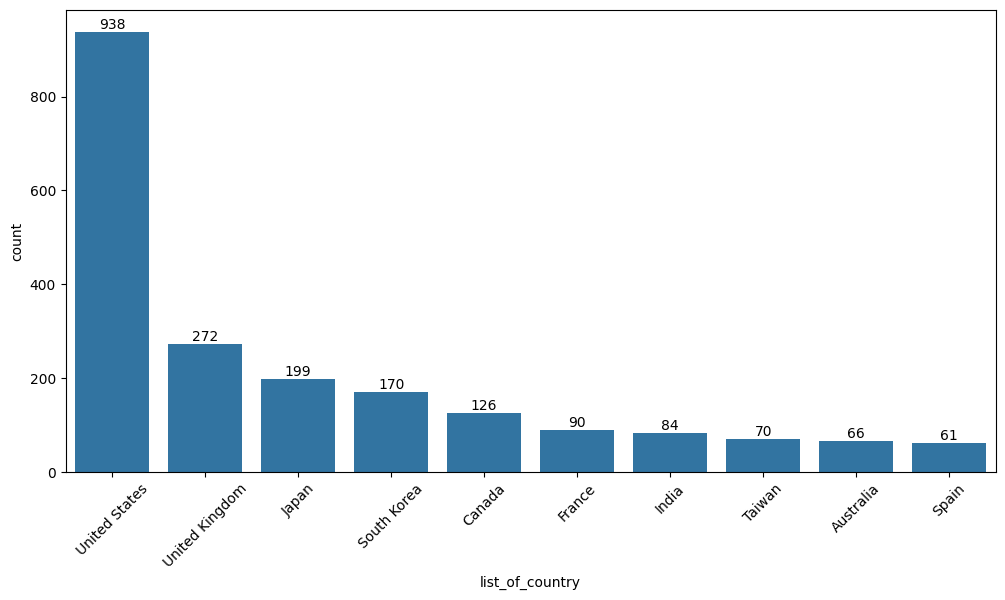

In [ ]:
plt.figure(figsize=(12,6))
t=sns.barplot(data=r, x="list_of_country", y="count")
plt.xticks(rotation=45)
t.bar_label(t.containers[0])
plt.show()

US is top most country to produce largets number of TV Show and UK, Japan, South Korea are under top 5 countries to produce TV Shows ,so netflix should consider these countries to launch TV Shows

#3. What is the best time to launch a TV show and Movies

3a: Find which is the best week to release the movie.

In [ ]:
movie_df["date_added"]=pd.to_datetime(movie_df["date_added"])


<ipython-input-878-e3a295743090>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["date_added"]=pd.to_datetime(movie_df["date_added"])


In [ ]:
movie_df["week"]=movie_df['date_added'].dt.isocalendar().week

<ipython-input-879-ef1f2b42a6ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["week"]=movie_df['date_added'].dt.isocalendar().week


In [ ]:
movie_df.groupby(by="week")["type"].value_counts().sort_values(ascending=False)

week  type 
1     Movie    316
44    Movie    243
40    Movie    215
9     Movie    207
26    Movie    195
35    Movie    189
31    Movie    185
13    Movie    174
18    Movie    173
27    Movie    154
22    Movie    146
48    Movie    139
5     Movie    135
14    Movie    124
16    Movie    124
50    Movie    119
30    Movie    116
11    Movie    115
37    Movie    114
23    Movie    112
39    Movie    111
17    Movie    109
10    Movie    107
7     Movie    106
33    Movie    105
34    Movie    102
25    Movie    101
15    Movie    100
36    Movie     97
49    Movie     95
29    Movie     94
42    Movie     90
28    Movie     89
24    Movie     89
38    Movie     88
43    Movie     88
51    Movie     86
20    Movie     85
47    Movie     85
41    Movie     84
46    Movie     83
3     Movie     81
52    Movie     80
2     Movie     78
21    Movie     76
32    Movie     73
19    Movie     73
8     Movie     72
12    Movie     67
6     Movie     64
45    Movie     61
53    Movie     61


**Best week to launch movie is first week** so netflix should consider first week of starting of new year to launch movie

In [ ]:
top_10_week=movie_df.groupby(by="week")["type"].value_counts().sort_values(ascending=False)
top_10_week=top_10_week[:10].reset_index(name="count")
top_10_week

,week,type,count
0,1,Movie,316
1,44,Movie,243
2,40,Movie,215
3,9,Movie,207
4,26,Movie,195
5,35,Movie,189
6,31,Movie,185
7,13,Movie,174
8,18,Movie,173
9,27,Movie,154


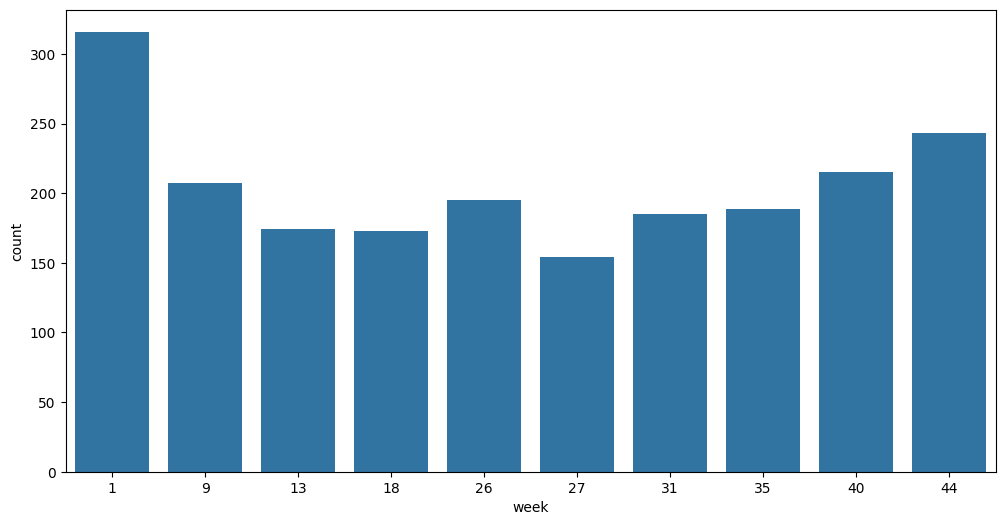

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_week, x="week",y="count")
plt.show()

**these are top 10 week to launch movie so netflix should consider these week to release new movie **

# Find which is the best week to release the TV Show.

In [ ]:
tvshow_df["date_added"]=pd.to_datetime(tvshow_df["date_added"],errors='coerce')
tvshow_df["week"]=tvshow_df['date_added'].dt.isocalendar().week
tvshow_df.groupby(by="week")["type"].value_counts().sort_values(ascending=False)

<ipython-input-883-ef7bdd640f12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_df["date_added"]=pd.to_datetime(tvshow_df["date_added"],errors='coerce')
<ipython-input-883-ef7bdd640f12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_df["week"]=tvshow_df['date_added'].dt.isocalendar().week


week  type   
27    TV Show    85
31    TV Show    79
24    TV Show    75
13    TV Show    74
35    TV Show    73
40    TV Show    69
26    TV Show    69
5     TV Show    68
37    TV Show    68
44    TV Show    67
50    TV Show    65
18    TV Show    60
1     TV Show    58
22    TV Show    56
48    TV Show    56
39    TV Show    55
46    TV Show    51
52    TV Show    50
38    TV Show    50
15    TV Show    50
32    TV Show    49
14    TV Show    48
51    TV Show    48
33    TV Show    47
11    TV Show    46
9     TV Show    46
17    TV Show    45
42    TV Show    45
30    TV Show    44
36    TV Show    44
29    TV Show    44
49    TV Show    44
20    TV Show    44
19    TV Show    43
25    TV Show    42
7     TV Show    41
53    TV Show    41
28    TV Show    40
12    TV Show    40
34    TV Show    40
23    TV Show    39
21    TV Show    39
8     TV Show    37
45    TV Show    36
47    TV Show    35
16    TV Show    34
6     TV Show    33
41    TV Show    31
4     TV Show    31
3     

27 week is best to launch TV show, so netflix should consider end of june or beggining of july to launch TV shows

In [ ]:
top_10_showweek=tvshow_df.groupby(by="week")["type"].value_counts().sort_values(ascending=False)
top_10_week=top_10_showweek[:10].reset_index(name="count")
top_10_week

,week,type,count
0,27,TV Show,85
1,31,TV Show,79
2,24,TV Show,75
3,13,TV Show,74
4,35,TV Show,73
5,40,TV Show,69
6,26,TV Show,69
7,5,TV Show,68
8,37,TV Show,68
9,44,TV Show,67


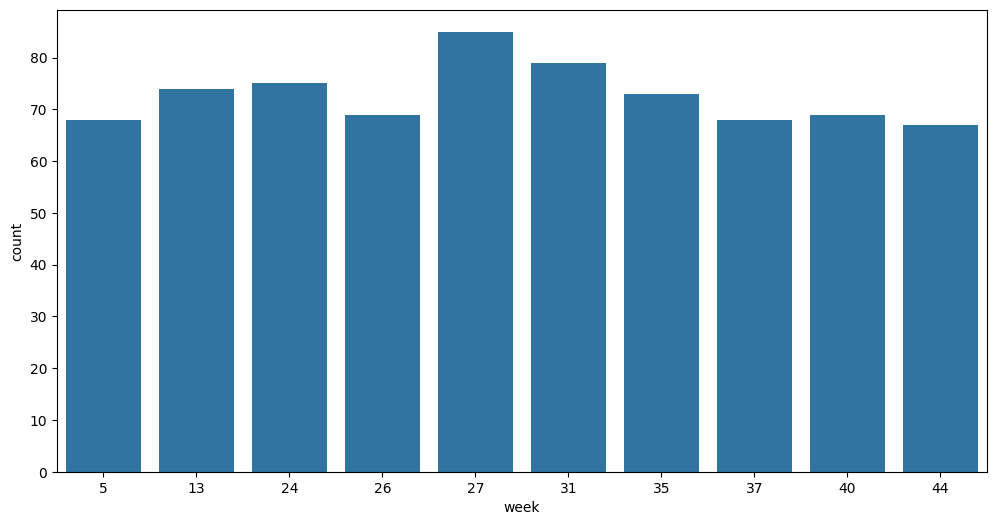

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_week, x="week",y="count")
plt.show()

**Netflix should consider these top 10 week to release TV Show**

 3b: Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
#for TV shows
tvshow_df["month"]=tvshow_df['date_added'].dt.month
tvshow_df.groupby(by="month")["type"].value_counts().sort_values(ascending=False)

<ipython-input-886-e6d585fa39a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_df["month"]=tvshow_df['date_added'].dt.month


month  type   
7.0    TV Show    255
12.0   TV Show    250
9.0    TV Show    247
6.0    TV Show    232
8.0    TV Show    230
10.0   TV Show    210
4.0    TV Show    209
3.0    TV Show    206
11.0   TV Show    199
1.0    TV Show    187
5.0    TV Show    187
2.0    TV Show    175
Name: count, dtype: int64

**Traditionally, there have been two peaks in viewership for television shows: December and July. This suggests that shows with broad appeal might benefit from launching around the Christmas holidays (December) or during the summer months (July) **

In [ ]:
top_10_month=tvshow_df.groupby(by="month")["type"].value_counts().sort_values(ascending=False)
top_10_month=top_10_month[:10].reset_index(name="count")
top_10_month

,month,type,count
0,7.0,TV Show,255
1,12.0,TV Show,250
2,9.0,TV Show,247
3,6.0,TV Show,232
4,8.0,TV Show,230
5,10.0,TV Show,210
6,4.0,TV Show,209
7,3.0,TV Show,206
8,11.0,TV Show,199
9,1.0,TV Show,187


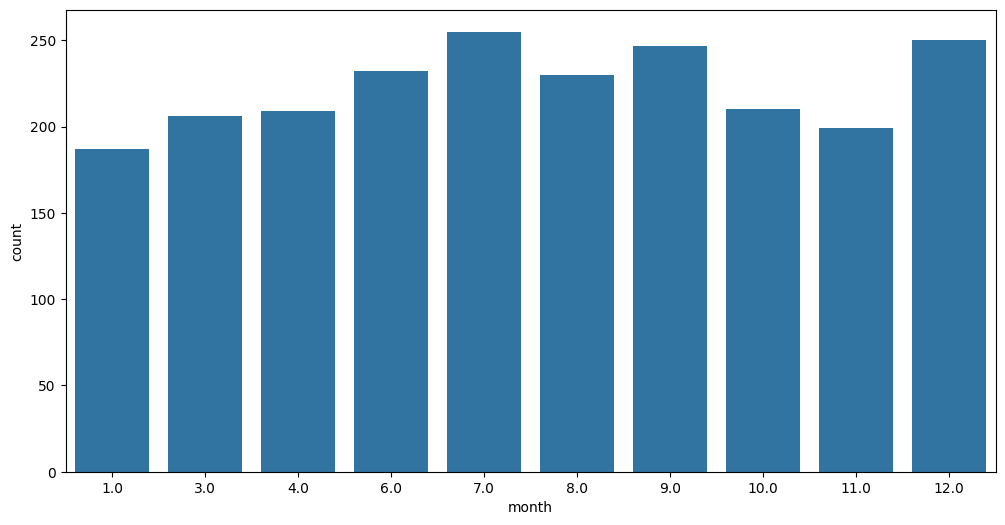

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_month, x="month",y="count")
plt.show()

**Netflix should consider these top 10 month to launch TV show**

#For Movies

In [ ]:
movie_df["month"]=movie_df['date_added'].dt.month
movie_df.groupby(by="month")["type"].value_counts().sort_values(ascending=False)

<ipython-input-889-b7a5f7a14bff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["month"]=movie_df['date_added'].dt.month


month  type 
7      Movie    565
4      Movie    550
12     Movie    547
1      Movie    546
10     Movie    545
3      Movie    529
8      Movie    519
9      Movie    519
11     Movie    498
6      Movie    492
5      Movie    439
2      Movie    382
Name: count, dtype: int64

In [ ]:
top_10_month=movie_df.groupby(by="month")["type"].value_counts().sort_values(ascending=False)
top_10_month=top_10_month[:10].reset_index(name="count")
top_10_month

,month,type,count
0,7,Movie,565
1,4,Movie,550
2,12,Movie,547
3,1,Movie,546
4,10,Movie,545
5,3,Movie,529
6,8,Movie,519
7,9,Movie,519
8,11,Movie,498
9,6,Movie,492


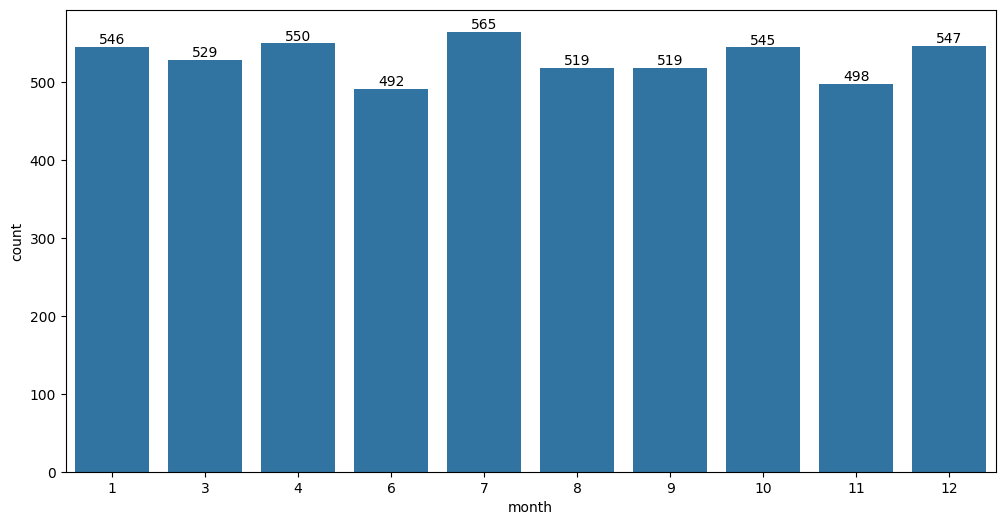

In [ ]:
plt.figure(figsize=(12,6))
o=sns.barplot(data=top_10_month, x="month",y="count")
o.bar_label(o.containers[0])
plt.show()

**To launch movie these are top 10 month to launch movie so before launching movie netflix should consider these 10 months to make movie more profitable**

#6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [ ]:
df2=df[["show_id","type","title","director","cast","country","date_added","release_year", "rating","duration","listed_in","description"]]

In [ ]:
df2["date_added"]=pd.to_datetime(df2["date_added"],errors='coerce')


<ipython-input-893-792d6a9cbc77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["date_added"]=pd.to_datetime(df2["date_added"],errors='coerce')


In [ ]:
df2.shape, df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8806 non-null   object        
 1   type          8806 non-null   object        
 2   title         8806 non-null   object        
 3   director      8806 non-null   object        
 4   cast          8806 non-null   object        
 5   country       8806 non-null   object        
 6   date_added    8718 non-null   datetime64[ns]
 7   release_year  8806 non-null   int64         
 8   rating        8802 non-null   object        
 9   duration      8806 non-null   object        
 10  listed_in     8806 non-null   object        
 11  description   8806 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.7+ KB


((8806, 12), None)

In [ ]:
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknow actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknow actor,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8802,s8804,TV Show,Zombie Dumb,Unknown director,Unknow actor,Unknown country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8803,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8804,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df2.loc["release_date"]=df2['release_year'].astype(str)+"-01-01"

<ipython-input-896-7c104d33269f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc["release_date"]=df2['release_year'].astype(str)+"-01-01"


In [ ]:
df2["release_date"]=pd.to_datetime(df2["release_year"])

<ipython-input-897-b488345e1366>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["release_date"]=pd.to_datetime(df2["release_year"])


In [ ]:
df2["diff_in_days"]=(df2["date_added"]-df2["release_date"]).dt.days
df2.head(5)

<ipython-input-898-dd5952d69039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["diff_in_days"]=(df2["date_added"]-df2["release_date"]).dt.days


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date,diff_in_days
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknow actor,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020,18894.0
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970-01-01 00:00:00.000002021,18893.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1970-01-01 00:00:00.000002021,18893.0
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknow actor,Unknown country,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1970-01-01 00:00:00.000002021,18893.0
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1970-01-01 00:00:00.000002021,18893.0


In [ ]:
df3=df2[["show_id","diff_in_days"]].sort_values(by="diff_in_days",ascending=False)
df3

,show_id,diff_in_days
0,s1,18894.0
6,s7,18893.0
10,s11,18893.0
9,s10,18893.0
8,s9,18893.0
...,...,...
8556,s8558,NaN
8683,s8685,NaN
8711,s8713,NaN
8754,s8756,NaN


In [ ]:
top_10__differences = df3[:10]

<function matplotlib.pyplot.show(close=None, block=None)>

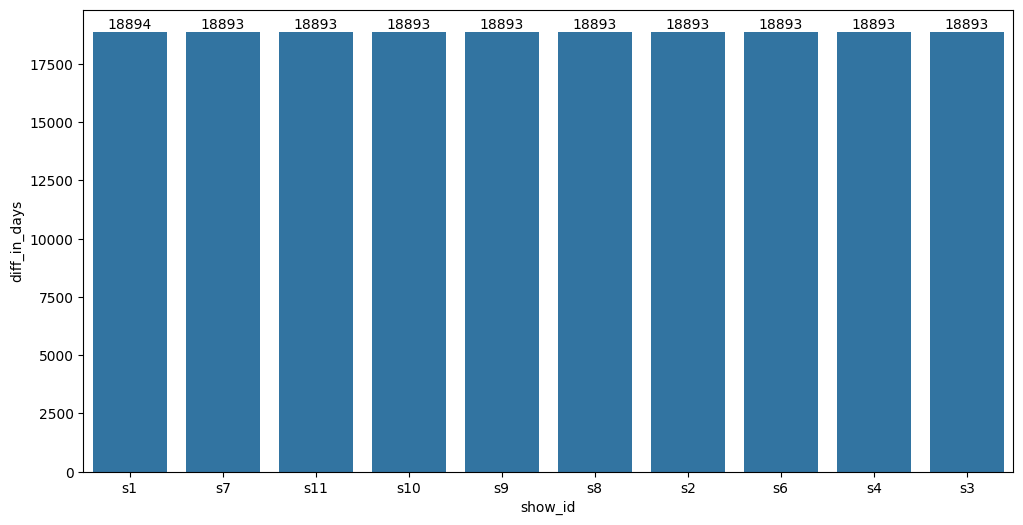

In [ ]:
plt.figure(figsize=(12,6))
d=sns.barplot(data=top_10__differences, x="show_id", y="diff_in_days")
d.bar_label(d.containers[0])
plt.show

after observing above graph show_id is shown movies/TV shows related to those show id have took longer time to launch at Netflix

In [ ]:

top_10__differences.merge(df2, on="show_id")

,show_id,diff_in_days_x,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date,diff_in_days_y
0,s1,18894.0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknow actor,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020,18894.0
1,s7,18893.0,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown country,2021-09-24,2021.0,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1970-01-01 00:00:00.000002021,18893.0
2,s11,18893.0,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown director,Unknow actor,Unknown country,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",1970-01-01 00:00:00.000002021,18893.0
3,s10,18893.0,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1970-01-01 00:00:00.000002021,18893.0
4,s9,18893.0,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021.0,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,1970-01-01 00:00:00.000002021,18893.0
5,s8,18893.0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1970-01-01 00:00:00.000001993,18893.0
6,s2,18893.0,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970-01-01 00:00:00.000002021,18893.0
7,s6,18893.0,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown country,2021-09-24,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1970-01-01 00:00:00.000002021,18893.0
8,s4,18893.0,TV Show,Jailbirds New Orleans,Unknown director,Unknow actor,Unknown country,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1970-01-01 00:00:00.000002021,18893.0
9,s3,18893.0,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1970-01-01 00:00:00.000002021,18893.0


These are the top 10 movies took longer time to be added on netflix, we can see all details related to those movies in dataframe

# Insights
**Genre Popularity by Country**:
In Canada, Comedies and Children & Family Movies are quite popular, suggesting a familyfriendly and humorous preference among viewers.
France leans towards International Movies and Dramas, indicating a taste for diverse cultural content and compelling storytelling.
Germany's preference seems to be towards Dramas and International Movies, with a smaller interest in Comedies.
India shows a strong preference for International Movies, Dramas, and Comedies, reflecting a diverse entertainment landscape catering to various tastes.
Japan has a significant interest in both International TV Shows and Anime Series, showing a unique blend of domestic and international content preferences.
South Korea leans towards International TV Shows and Korean TV Shows, showcasing a preference for domestic productions along with international content.
Spain enjoys a mix of International Movies, Dramas, and International TV Shows, indicating a diverse taste in entertainment.
The United Kingdom's interest lies in Dramas and British TV Shows, with a substantial viewership for International Movies as well, reflecting a blend of domestic and international preferences.
The United States has a strong preference for Comedies, Dramas, and Children & Family Movies, indicating a broad audience appeal across various genres.

# Actions Suggested

**Market Opportunities and Target Audience**:
Content creators or distributors can tailor their offerings based on the prevalent genre preferences in each country to better target the local audience.
For example, in countries like Canada and Germany, there may be opportunities to introduce more family-friendly content or compelling dramas to cater to the audience's preferences.
In markets like India and Japan, there's a high demand for a diverse range of content, offering opportunities for both domestic and international productions to thrive.

# Insights
**TV Shows**:
The most common duration for TV shows is "1 Season," with a significant number of titles associated with it.
"2 Seasons" and "3 Seasons" follow as the next popular durations for TV shows.

**Movies**:
For movies, durations of 94 minutes, 106 minutes, and 97 minutes are the top three most common durations.
# Actionable Insights

**Content Planning**

**TV Shows**:
 Focus on producing more single-season TV shows, as they are the most prevalent. Consider creating content that can be completed within one season to cater to viewer preferences.

**Movies**:
Since movies with durations around 94-106 minutes are popular, consider producing more movies within this duration range to align with audience preferences.

**Audience Engagement**

**TV Shows**:
 Engage viewers by promoting binge-worthy TV shows with multiple seasons, as they are also popular among audiences.

**Movies**:
Curate movie collections or playlists based on the popular durations to enhance viewer experience and engagement

**What is the best time to launch a TV show**?
# Insights
**Optimal Timing for TV Shows**: Week 27 (July) and December emerge as the best times to launch TV shows, based on the analysis of release weeks and months. This suggests that content creators should strategically plan TV show releases during these periods to maximize audience engagement and viewership.


**Favorable Periods for Movie Releases**: Week 1 (January) and July are identified as the prime times for launching movies. The beginning of the year presents an opportunity for successful movie debuts, while the summer month of July indicates a seasonally favorable period for blockbuster releases.


**Seasonal Trends**: The insights highlight seasonal trends influencing audience preferences and consumption habits. December and July coincide with holidays and vacation periods, potentially leading to higher viewership for both TV shows and movies during these months.  


# Actionable

**Plan Release Schedules Accordingly**: Content creators and distributors should align their release schedules with the identified optimal weeks and months for TV shows and movies. By strategically timing releases during Week 27 (July) and December for TV shows, and Week 1 (January) and July for movies, they can capitalize on increased audience attention and engagement.


**Tailor Content Strategies**: Develop content strategies that cater to the preferences and consumption patterns of audiences during peak release periods. Consider factors such as genre trends, audience demographics, and competition when planning content launches.


**Maximize Marketing Efforts**: Especially During Holidays: Invest in robust marketing and promotional campaigns, particularly during holiday periods, to leverage increased audience engagement. Holidays provide opportune moments for reaching audiences when they are more receptive to entertainment content. Utilize various marketing channels such as digital platforms, social media, influencer partnerships, and targeted advertising to amplify visibility and engagement